In [58]:
cat('Last updated ', date())

Last updated  Sat Oct 22 14:03:49 2022

_This is a study note while I am studyig __Generalized Linear Models and Nonparametric Regression__ offered by University of Colorado Boulder in Coursera_

# Week3. Introduction to Nonparametric Regression

## I. Nonparametric Regression Theory

### 1. Introduction to Nonparametric Regression Model

__1) Motivation__: Parametric model

A parametric statistical model is a family of probability distributions with a finite set of parameters.<br>

_Example_: The normal regression model : $\mathbf Y\sim N(X\beta, \sigma^2I_n)$

* $X\beta$: p+1 parameters (including $\beta_0$)
* $\sigma^2I_n$: 1 parameter ($\sigma$)

Overall, we need to know p+2 parameters to estimate in this model.

The Poisson and the Binomial we have studied are all parametric models. For example, a binomial reponse with a linear predictor and a logit link function.

We call that a nonparametric model is a family of probability distributions with infinitely many parameters.

__2) Motivation__: Non-Parametric model

A nonparametric statistical model is a family of probability distributions with infinitely many parameters.

_Example_:  $\mathbf Y\sim N(f(\mathbf x _1), \sigma^2I_n)$


* Suppose $f(\mathbf x _1)$ is an arbitrary function. $x_1 \in [-1,1]$ . This can be any function that has a domain from -1 to 1. Since this function is arbitrary on this interval, no finite set of parameters could spefity its form. We would need an infinite numbers of parameters to specify exactly what this funcion would be. We would need infinite data so what are trying to estimate it.

__3) Motivation__: General form

We are trying to model the mean of the response in the following way.

A relatively general form of a statistical modeling problem is

$$\mu_i = E(Y_i)=f(x_{i,1},x_{i,2}, \cdots, x_{i,p} )$$


* In Normal regression, $f(\mathbf x)=\beta_0+\beta_1x_{i,1}+\cdots+\beta_px_{i,p}$


* In Poission regression, $f(\mathbf x)=exp\{\beta_0+\beta_1x_{i,1}+\cdots+\beta_px_{i,p}\}$

Non parametric regression allows us to be more flexible with the form of f.

Rather than choose the function form beforehand, e.g:
*  $f(\mathbf x)=\beta_0+\beta_1x_{i,1}+\cdots+\beta_px_{i,p}$ (normal linear regression)
*  $f(\mathbf x)=exp\{\beta_0+\beta_1x_{i,1}+\cdots+\beta_px_{i,p}\}$ (Poission regression)

__4) Parametric vs Nonparametric Modeling__

We learn $ f$ by assuming it comes from some smooth family of functions. In this case, the set of potential fits to the data is much larger than the parametric approach.

In [59]:
set.seed(123)

n = 150
x = runif(n, 0, pi/2) 
y = sin(pi*x) + rnorm(n, 0, 0.5) + 4

df = data.frame(x = x, y = y)
head(df)

,x,y
,<dbl>,<dbl>
1,0.45172571,5.501308
2,1.23826681,3.177046
3,0.64241945,4.291206
4,1.38704049,3.152961
5,1.47728256,2.933100
6,0.07155998,4.225805


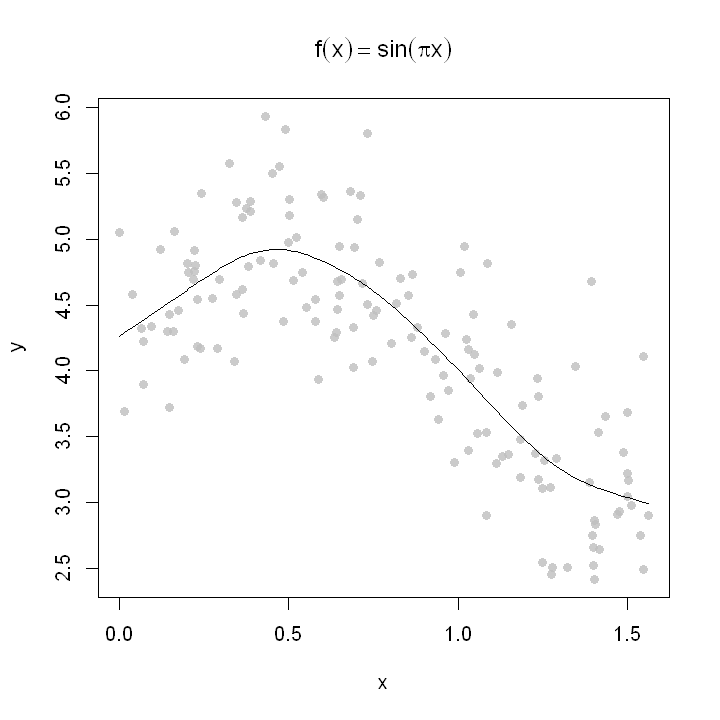

In [60]:
options(repr.plot.width=6, repr.plot.height=6)

library(ggplot2)
plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, col = alpha("grey", 0.8))
lines(smooth.spline(x, y, spar = 1))

__5) Advantage vs Disadvantage__ of the nonparametric approach:

__Advantage__

1. Flexigility
2. Fewer distributional assumptions

__Disadvantage__
1. Less efficient when structure of the relationship is available.
2. Interpretation difficulties 

3. We don't really have a formulaic way of describing the relationship between the predictors and the reponse.

### 2. Motivating Kernel Estimators

In [61]:
setwd('C:/Users/shims/Desktop/Generalized Linear Models and Nonparametric Regression')

In [62]:
bone <- read.csv('bone.csv', head=TRUE)

In [63]:
y=bone$spnbmd
x=bone$age

In [64]:
library(ggplot2)

__1) Simple Linear model__

`geom_smooth()` using formula 'y ~ x'



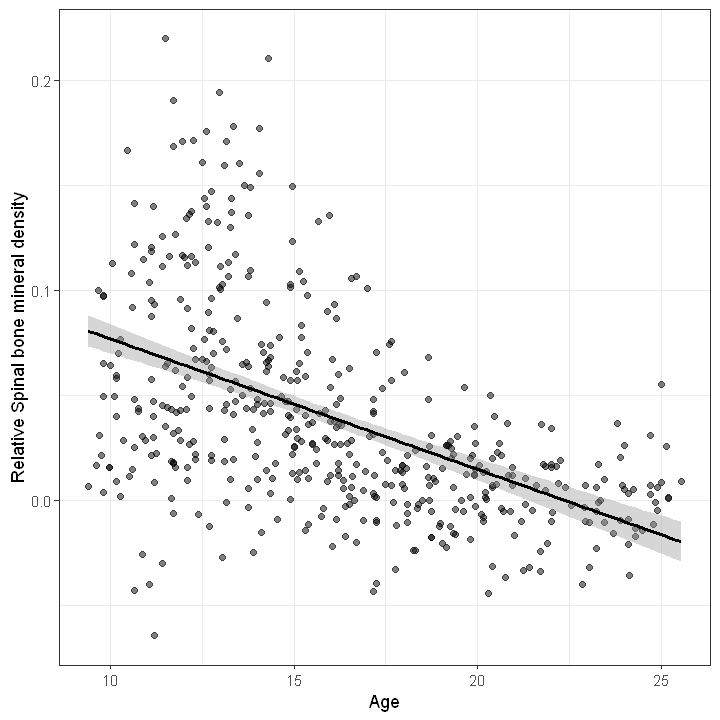

In [65]:
ggplot(bone, aes(x = x, y = y)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(method = "lm", col = "black") +
    theme_bw() + # background color 
    labs(x = "Age", y='Relative Spinal bone mineral density') 

The plot between Age and Bone density does not appear a linear realationship. A better way to diagnose non-linearity would be to look at the residuals vs fitted values of this linear regression model. We see that there is an evidence of non-constant variance. Also, we see that there is some non-liner structure in the following plot.

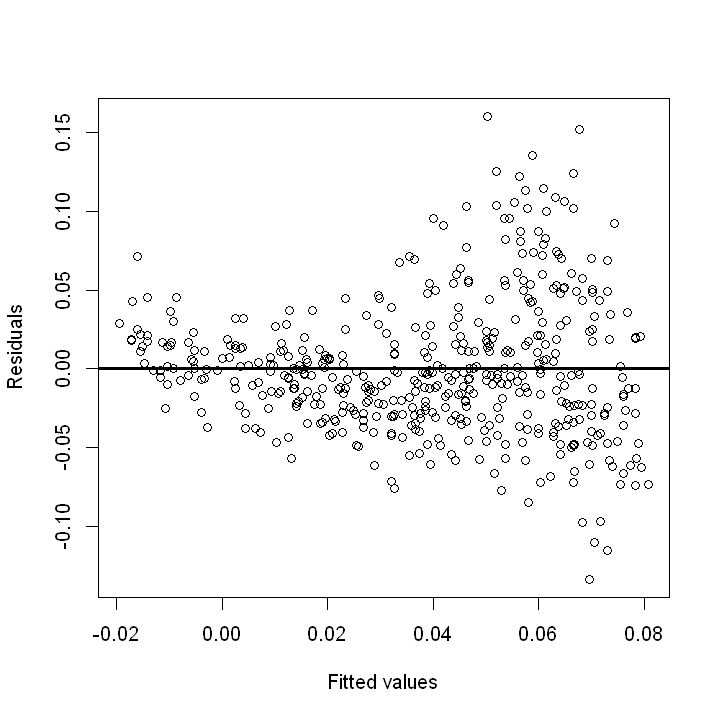

In [66]:
model1 <- lm(y~x)
res<-summary(model1)$residuals
fitted<-predict(model1)
plot(fitted, res, xlab='Fitted values', ylab="Residuals")
abline(h=0,lwd=3)

__2) Polynomial model__

We could try something like adding polynomial terms to the model. 
$ Y_i = \underbrace{\beta_0+\beta_1x_i+\beta_2x^2_i+\cdots+\beta_dx^d_i}_\text{f($x_i$)} + \epsilon_i$

Where d is the degree of the polynomial that we would like to fit.
* d=1 : simple linear regression model
* d=2 : adding in the square term
* d=3 : cubic term

Note that if you start with d=5, you need to contain $x, x^2, x^3, x^4, x^5$ in your model.

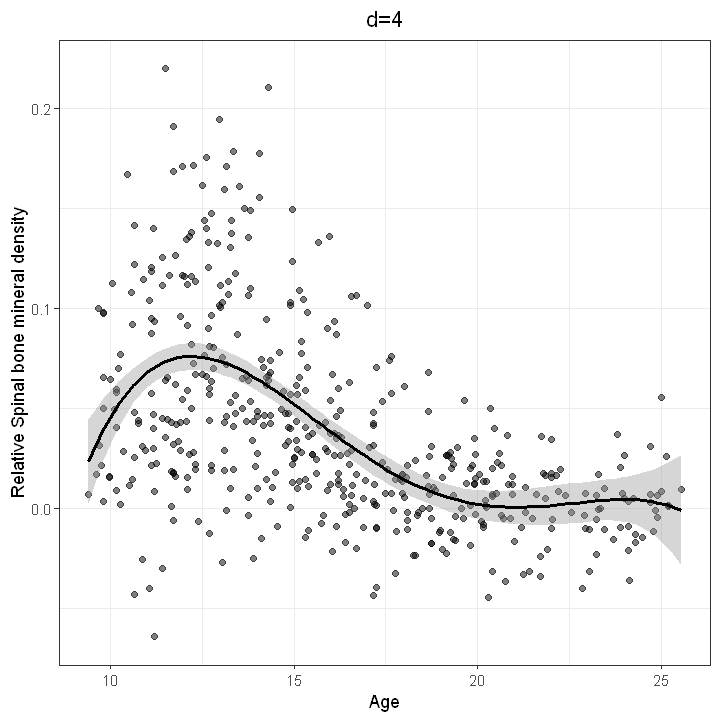

In [67]:
ggplot(bone, aes(x = x, y = y)) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(method = "lm", col = "black", formula=y ~ poly(x, 4, raw=TRUE)) +
    theme_bw() + # background color 
    labs(x = "Age", y='Relative Spinal bone mineral density') +
    ggtitle("d=4") +
    theme(plot.title = element_text(hjust = 0.5))

Let see the plot of residuals vs fitted value. It sill show some sings of misfit. Suppose we have several predictors. How would we think about eliminating different terms when we have many possible predictors.? An automated way to decide on the form of x is Kernel smoothing as one non -parametric method.

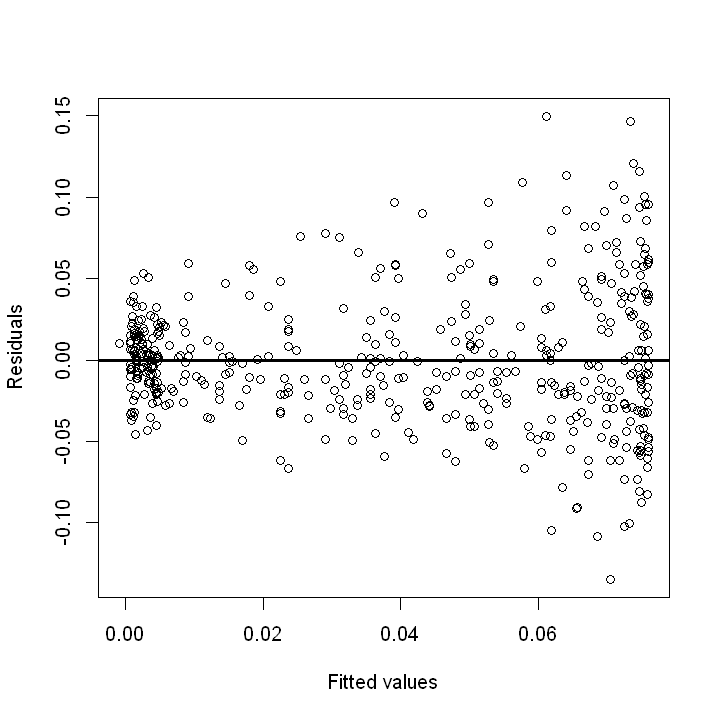

In [68]:
model2 <- lm(y~poly(x,4))
res2<-summary(model2)$residuals
fitted2<-predict(model2)
plot(fitted2, res2, xlab='Fitted values', ylab="Residuals")
abline(h=0,lwd=3)

__3) Kernel estimator__

This looks similar to the degree 4 polynomial, but we did not make a choice about what the degree of the polymonial is. But we have to make some choice in the Kernel estimator and will discuss later.

In [69]:
z <- ksmooth(x=bone$age, y=bone$spnbmd, kernel="normal", bandwidth=1)

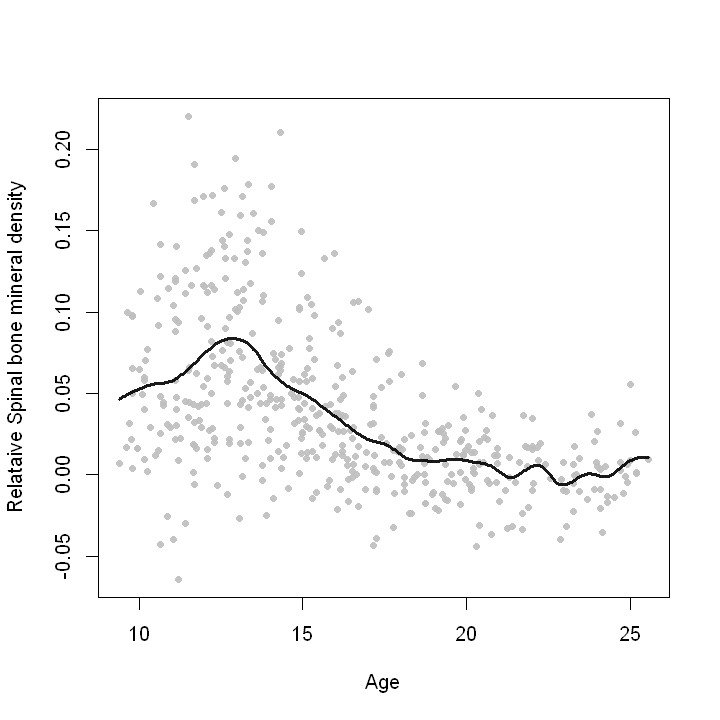

In [70]:
plot(spnbmd ~ age, data=bone, pch=16, cex=0.8, col = alpha("gray", 0.9), xlab="Age", ylab="Relataive Spinal bone mineral density")
lines(z, lwd=3, col = alpha("black", 0.9))

### 3. Kernel Estimators

__1) Definition__

A kernel estimator can be understood as a simple weighted local moving average of the reponse. $f$ is not specified and it is to be estimated from the data.

Model: $Y_i = f(x_i)+\epsilon_i$, $\epsilon_i \sim N(0, \sigma^2)$

## $\hat {f}_\lambda (x) = \frac{\frac{1}{n\lambda}\sum_{i=1}^n K(\frac{x-x_i}{\lambda})Y_i}{\frac{1}{n\lambda}\sum_{i=1}^n K(\frac{x-x_i}{\lambda})}$



* K is a function of $\frac{x-x_i}{\lambda}$. 
* The $\lambda$ and $K(\cdot)$ is basically the weight. 
If we define $w_i=\frac{1}{\lambda}K(\frac{x-x_i}{\lambda})$ ,  
the function would be 
$\hat {f}_\lambda (x) = \frac{\frac{1}{n} \sum_{i=1}^n w_i Y_i}
                             {\frac{1}{n}\sum_{i=1}^n w_i}$

__Definition__ : A _kernel_ is a nonnegative, real-valued function $K$ such that $K(x)=K(-x)$ for all values of $x$(symmetry) and $\int K(x) dx = 1$ (normalization). 

__Note__: Non-negarivitiy and nomralization are defining features of Probability density funcions(PDFs), so we can use PDFs a kernels, ex. normal pdf as kernel.

__2). Commnly used kernels__

1. Uniform/ rectangular:  $K(x)=\frac{1}{2}, \;\; -1 \leq x \leq 1$
2. Gaussian/Normal: $K(x) = \frac{1}{\sqrt{2\pi}}exp\{\frac{-x^2}{2}\}$
3. EpanechnikovL $K(x) = \frac{3}{4}(1-x)^2,  \;\; -1 \leq x \leq 1 $

__3). Kernel Estimators__

The _bandwidth_ or _smoothing parameter_ ($\lambda$) __controls__ the smoothness or bumpiness of the estimate, $\hat {f}$. In general, smaller $\lambda$ values will give bumpier fits and larger $\lambda$ values will give smoother fits.

In [71]:
z1 <- ksmooth(x=bone$age, y=bone$spnbmd, kernel="normal", bandwidth=0.1)
z2 <- ksmooth(x=bone$age, y=bone$spnbmd, kernel="normal", bandwidth=2)
z3 <- ksmooth(x=bone$age, y=bone$spnbmd, kernel="normal", bandwidth=10)

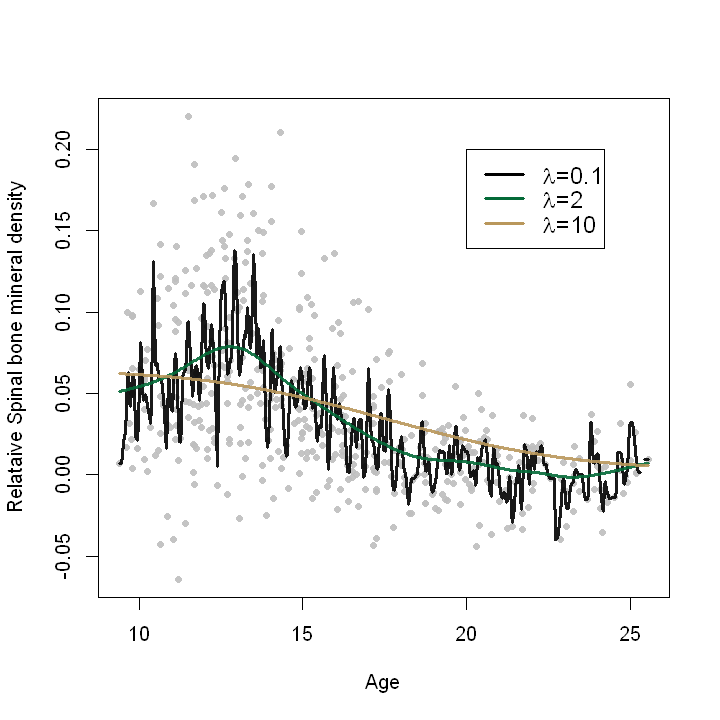

In [72]:
plot(spnbmd ~ age, data=bone, pch=16, cex=0.8, col = alpha("gray", 0.9), xlab="Age", ylab="Relataive Spinal bone mineral density")
lines(z1, lwd=3, col = alpha("black", 0.9))
lines(z2, lwd=3, col = alpha("#046A38", 0.9))
lines(z3, lwd=3, col = alpha("#B9975B", 0.9))


legend(x=20, y=0.2, lwd=3, lty=c(1,1,1), legend=c( expression(paste(lambda, "=0.1")),  
                               expression(paste(lambda, "=2")),
                            expression(paste(lambda, "=10"))),
                     col=c('black', '#046A38', '#B9975B'), cex=1.2)

We see that when $\lambda$ =0.1, the curve is sensitive in the fit. 

__4) Bandwidth Selection__ - We can use cross-validation method. 

### 4. Smoothing Splines

__1) Introduction__

Another nonparametric regression method is "Smoothing Splines".

Given the model $Y_i = f(x_i) + \epsilon_i $ , we might consider choosing $\hat f $ by minimizing:
$$ MSE  = \frac{1}{n}\sum_{i=1}^n (Y_i - f(x_i))^2$$

Instead of minimizing the MSE, we can minimize the sum of MSE and the oter term. The $\int$ term is called the roughness penalty. THe roughness penalty will basically penalize certain functions for being too wiggly or too rough. We have also $\lambda$ which is a real number and greater than 0, it is a smoothing parameter. It will control how much the roughness penalty matters in this minimization problem.


$$\underbrace{ \frac{1}{n}\sum_{i=1}^n (Y_i - f(x_i))^2}_\text{fit} + 
  \underbrace{  \lambda \int [f^{\prime\prime}(x)]^2dx}_\text{smoothness}$$
  
  * fit : the smaller the term is the closer the fit will be the data.
  * smootheness: It penalizes functions that have more curvature.
      * If $f(x)$ is a linear, $f^{\prime\prime}(x)=0$ and $\int 
      f^{\prime\prime}(x)^2dx=0$ . That is great for minimization. But actually, we have more complexed model, so the smoothness term is to be positive not just zero.

__2) Example__

__Definition__: A _spline_ is a piecewise function, where each segment is a polynomial. 

__Definition__: A _**cubic**_ spline is a spline where the segment polyomials are each of __degress three__. 

Splines are meant to be continuous and have continuous derivatives. 

## Graph is under-construcction. 

In [73]:
install.packages('splines')

Warning message:
"package 'splines' is a base package, and should not be updated"


In [74]:
x <- c(0,1,2,3,4,5,6,7,8,9,10)
y <- c(1,1,0.9,0.5, -0.3, -0.9, -0.7, 0.7, 0.7, -0.9, 0.1)

In [75]:
xy<- data.frame(cbind(x,y))

In [76]:
func = splinefun(x=x, y=y, method="fmm",  ties = mean)

In [14]:
lm.poly <- lm( y ~ poly(x, 3))

In [16]:
lm.poly 


Call:
lm(formula = y ~ poly(x, 3))

Coefficients:
(Intercept)  poly(x, 3)1  poly(x, 3)2  poly(x, 3)3  
     0.1909      -1.2109       0.8979      -0.1557  


In [20]:
lm( y ~ bs(x, df=3))

ERROR: Error in bs(x, df = 3): could not find function "bs"


In [11]:
ns(x)

ERROR: Error in ns(x): could not find function "ns"


Warning message in abline(lm.poly):
"only using the first two of 4 regression coefficients"


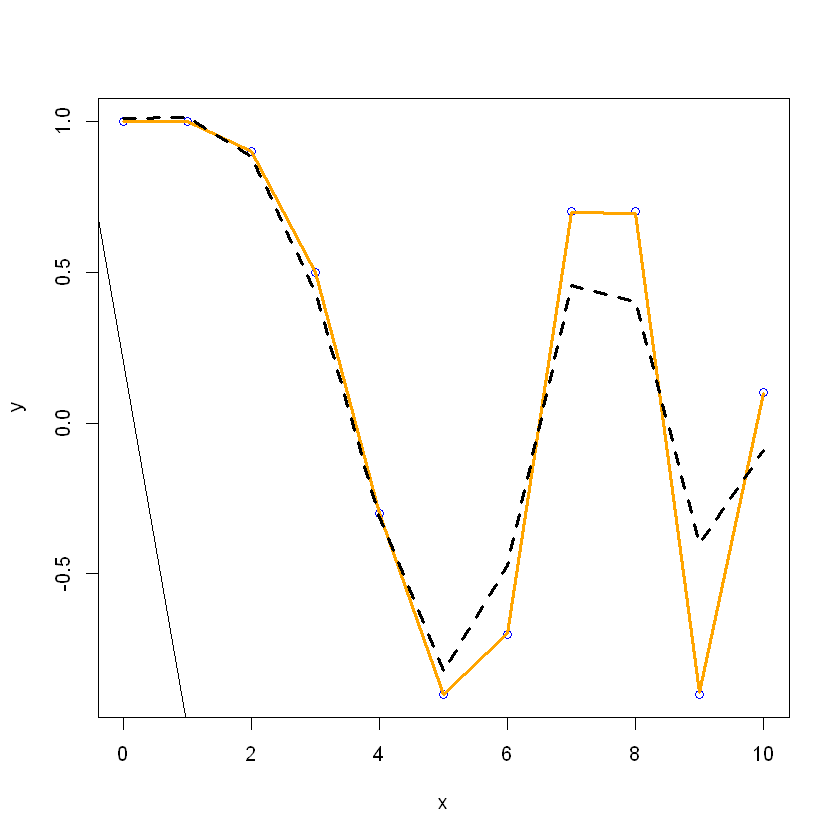

In [17]:
plot( x, y, col='blue')
lines(smooth.spline(x, y, spar = 0), col="orange", lwd=3)
lines(smooth.spline(x, y, spar = 0.3, , cv=TRUE), lwd=3, lty=2)
abline(lm.poly)

In [ ]:
https://timodenk.com/blog/cubic-spline-interpolation/

__3) Smoothing Splines__

__Definition__: A _**smoothing spline**_ is a spline desigend to balance fit with smoothness. The smoothing spline is defined in terms of the minimization of the function from 

$$\underbrace{ \frac{1}{n}\sum_{i=1}^n (Y_i - f(x_i))^2}_\text{fit} + 
  \underbrace{  \lambda \int [f^{\prime\prime}(x)]^2dx}_\text{smoothness}$$


In the following figure:

* the dotted line: a cubic spline
* the solid line: a cubic smoothing spline

The regular cubic spline is more wiggly than the cubic smoothing spline becase of the second term of the function.

In [ ]:
## Graph is under-construcction. 

In [44]:
x <- c(0, 1, 2, 3, 4, 5, 6)
y <- c(1, 2, 0.5, 1.5, 2.5, 2.5, 0.5)

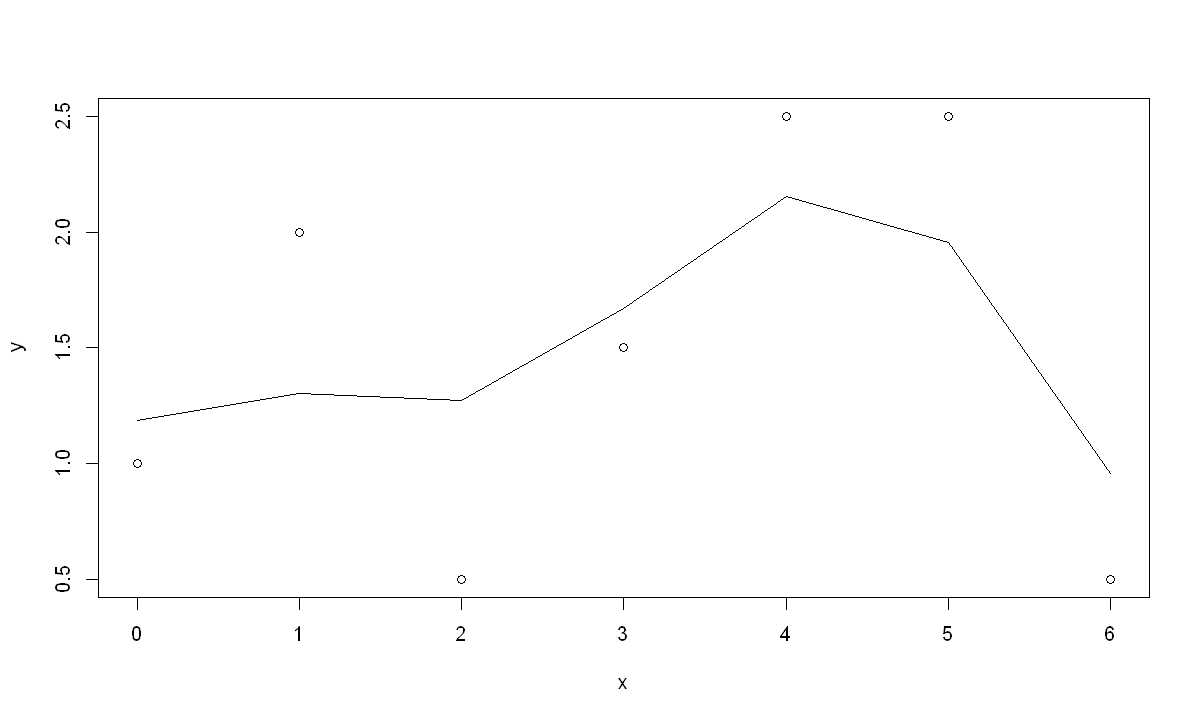

In [49]:
plot(x, y)
lines(smooth.spline(x,y, spar = 0.4))

A cubic smoothing spline is the class of functions that minimizes


$$\underbrace{ \frac{1}{n}\sum_{i=1}^n (Y_i - f(x_i))^2}_\text{fit} + 
  \underbrace{  \lambda \int [f^{\prime\prime}(x)]^2dx}_\text{smoothness}$$

Since we know the form of the solution, the estimation problem is reduced to a parametric problem of estimating coefficients of the piecewise polynomials. 

__4) Smoothing Splines in R__

In [36]:
set.seed(123)

n = 150
x = runif(n, 0, pi/2) 
y = sin(pi*x) + rnorm(n, 0, 0.5) + 4

df = data.frame(x = x, y = y)
head(df)

,x,y
,<dbl>,<dbl>
1,0.45172571,5.501308
2,1.23826681,3.177046
3,0.64241945,4.291206
4,1.38704049,3.152961
5,1.47728256,2.933100
6,0.07155998,4.225805


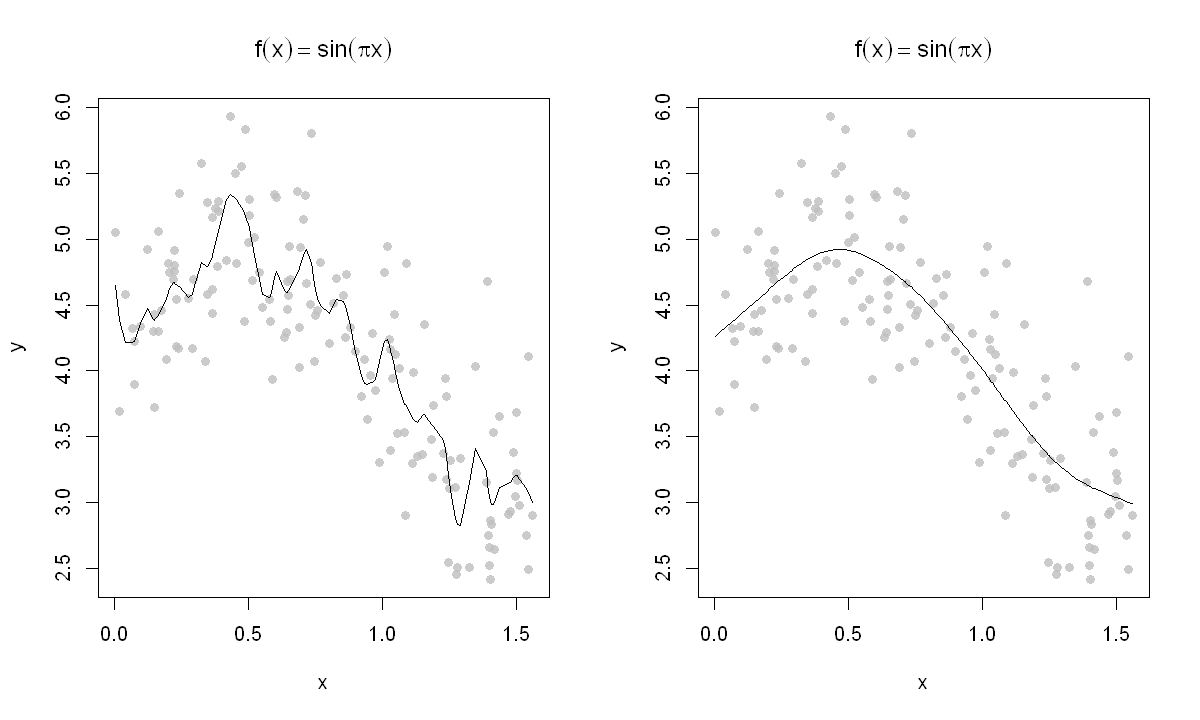

In [42]:
options(repr.plot.width=10, repr.plot.height=6)

par(mfrow=c(1,2))

library(ggplot2)
plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, col = alpha("grey", 0.8))
lines(smooth.spline(x, y, spar = 0.5))

plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, col = alpha("grey", 0.8))
lines(smooth.spline(x,y, spar = 1))

The two plots will show different values of a function of $\lambda$. Different $\lambda$ will give you different fits. The left graph is with small $\lambda$ and the right graph with relatively large $\lambda$. (small $\lambda$ is placing low emphasis on smoothness.)

In the R function, __smooth.spline(x,y, spar= ...)__ spar is a function of $\lambda$.

You can try many $\lambda$s, and then you can choose one, but there also are automatic methods for choosing $\lambda$ like cross-validation.

### 5. Loess: Locally Estimated Scatterplot Smoothing

__1) General Structure of fitting a statistical model__

Given the model $Y_i = f(x_i) + \epsilon_i $ , we might consider choosing $\hat f $ by minimizing:
$$ MSE  = \frac{1}{n}\sum_{i=1}^n (Y_i - f(x_i))^2$$

__2) $f(x)=?$__

* In the linear regression, we set $f(x)$ is a linear fuction parameters.Then we can use R funcion.

* We can set up $f(x)$ taylor expansion. Why this is helpful? Suppose...the talyor expansion term is coeffiecit term.  $f(x) \approx 
       \underbrace{ f(x_0)}_\text{$\beta_0$} + 
       \underbrace{ \frac{f^{\prime}(x_0)}{1!}}_\text{$\beta_1$}(x-x_0) 
+\cdots+ \underbrace{\frac{f^{(p)}(x_0)}{p!}}_\text{$\beta_p$}(x-x_0)^p$

We can interpret this as a polynomial of degree p with coefficients. That puts us back in to the linear regression context. 


__3) $MSE_{Taylor}$__

We can obtain MSE of polynomial

$MSE_{Taylor} = \frac{1}{n}
                \sum_{i=1}^{n} 
                (Y_i - 
                \sum_{j=0}^p
                \beta_j(x-x_0)^p)^2)$
                
Where $\beta_j = \frac{f^{(j)}(x_0)}{j!}$

So we can estimate those terms using ordinary least squares. > we have a linear square problem.

__MSE using taylor expansion using a weight funcion__


$MSE^w_{Taylor} = \frac{1}{n}
                \sum_{i=1}^{n} \underbrace{ w_i(x-x_0)}_\text{(*)}
                (Y_i - 
                \sum_{j=0}^p
                \beta_j(x-x_0)^p)^2)$
                
Where $\beta_j = \frac{f^{(j)}(x_0)}{j!}$, 

(*) only care about points very close to $x_0$


There are different possible weight function you can use, the standard one is


$w_i(x) =\begin{cases} (1 - |x|^3)^3  & if \; |x| <1 \\
                         1  & if  \; |x| \ge 1
       \end{cases}$
       
       
* R has easy ways of fitting the loess model to the data. 

__4) Advantages and disadvantaages to the loess mothod.__

* Advantages:
    1. Flexible fit ( we can use pre-specified model such aslinear regression model)
    2. Relatively simple to implement
    3. Uncertainty quantification
    
    
* Disadvantages:
    1. Can be computationally expensive
    2. Interpretation cna be more difficult
    3. Requires relarively large, densely smpled data in order to produce a good model. If you have a pretty sparse data set, then this could be problematic in giving a nice fit. 